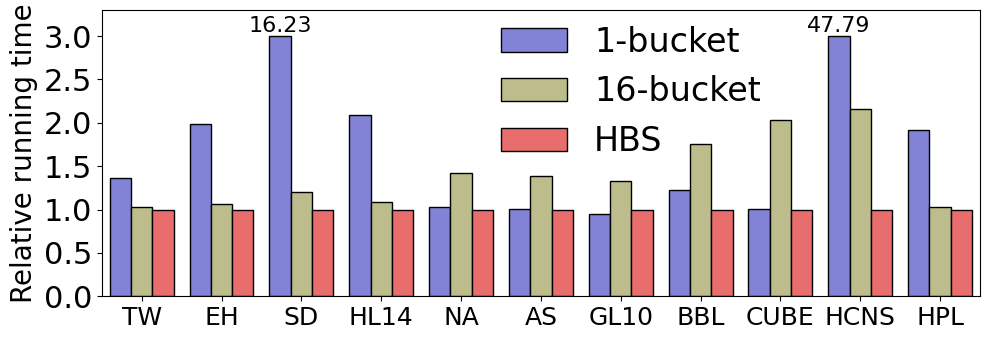

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = './../data/bucketing.csv'
data = pd.read_csv(file_path, keep_default_na=False)
data.columns = data.columns.str.strip()


data['1-bucket'] = data['fixed (1)'] / data['HBS']
data['16-bucket'] = data['fixed (16)'] / data['HBS']
default_palette = ["#7474E4", "#C4C484", "#FC5858"]


# data['HBS over hierarchical'] = data['hierarchical'] / data['HBS']

data['original 1-bucket'] = data['1-bucket']
data['original 16-bucket'] = data['16-bucket']
# data['original HBS over hierarchical'] = data['HBS over hierarchical']

data['1-bucket'] = data['1-bucket'].apply(lambda x: min(x, 3))
data['HBS'] = 1

data['16-bucket'] = data['16-bucket'].apply(lambda x: min(x, 3))


speedup_data = data[['Unnamed: 0', '1-bucket', '16-bucket', 'HBS']]
original_data = data[['Unnamed: 0', 'original 1-bucket', 'original 16-bucket']]

melted_speedup = pd.melt(speedup_data, id_vars='Unnamed: 0', 
                         var_name='Speedup Type', value_name='Speedup')

melted_original = pd.melt(original_data, id_vars='Unnamed: 0', 
                          var_name='Speedup Type', value_name='Original Speedup')

plt.figure(figsize=(10, 3.5))

ax = sns.barplot(data=melted_speedup, x='Unnamed: 0', y='Speedup', hue='Speedup Type', 
                 palette=default_palette, edgecolor='black', dodge=True)

ax.set_ylim(0, 3.3)

# Add annotations for bars that reach a height of 3 (truncated values)
for p, original_value in zip(ax.patches, melted_original['Original Speedup']):
    height = p.get_height()
    if height == 3:
        ax.annotate(f'{original_value:.2f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=16, color='black')

# Customize the plot labels and legend
plt.xlabel('', fontsize=22)
plt.ylabel('Relative running time', fontsize=20)
plt.xticks(rotation=0, ha='center', fontsize=18)  
plt.yticks(fontsize=22)
plt.legend(frameon=False, fontsize=24, bbox_to_anchor=(0.42, 1.05), loc=2)

plt.tight_layout()

# Save the figure to a file and show the plot
plt.savefig('./bucketing_exp.pdf')
plt.show()
